<a href="https://colab.research.google.com/github/pinilDissanayaka/Brain-tumor-detection-with-MobileNetV3Small-using-Tensorflow/blob/main/Notebooks/Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json


In [10]:
! kaggle datasets download thomasdubail/brain-tumors-256x256

 59% 35.0M/59.4M [00:00<00:00, 185MB/s]
100% 59.4M/59.4M [00:00<00:00, 216MB/s]


In [12]:
! unzip /content/brain-tumors-256x256.zip

Archive:  /content/brain-tumors-256x256.zip
  inflating: Data/glioma_tumor/G_1.jpg  
  inflating: Data/glioma_tumor/G_10.jpg  
  inflating: Data/glioma_tumor/G_100.jpg  
  inflating: Data/glioma_tumor/G_101.jpg  
  inflating: Data/glioma_tumor/G_102.jpg  
  inflating: Data/glioma_tumor/G_103.jpg  
  inflating: Data/glioma_tumor/G_104.jpg  
  inflating: Data/glioma_tumor/G_105.jpg  
  inflating: Data/glioma_tumor/G_106.jpg  
  inflating: Data/glioma_tumor/G_107.jpg  
  inflating: Data/glioma_tumor/G_108.jpg  
  inflating: Data/glioma_tumor/G_109.jpg  
  inflating: Data/glioma_tumor/G_11.jpg  
  inflating: Data/glioma_tumor/G_110.jpg  
  inflating: Data/glioma_tumor/G_111.jpg  
  inflating: Data/glioma_tumor/G_112.jpg  
  inflating: Data/glioma_tumor/G_113.jpg  
  inflating: Data/glioma_tumor/G_114.jpg  
  inflating: Data/glioma_tumor/G_115.jpg  
  inflating: Data/glioma_tumor/G_116.jpg  
  inflating: Data/glioma_tumor/G_117.jpg  
  inflating: Data/glioma_tumor/G_118.jpg  
  inflating: D

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense

import warnings
warnings.filterwarnings(action = 'ignore')

In [20]:
root = '/content/Data/'

In [21]:
out_classes = list(os.listdir(root))
out_size = len(out_classes)

print(f"outupt classes : {out_classes}")
print(f"output size : {out_size}")

outupt classes : ['normal', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
output size : 4


In [22]:
for i in range(0, out_size):
    print(f"{out_classes[i]} contain {len(list(os.listdir(root + out_classes[i])))} images.")

normal contain 438 images.
glioma_tumor contain 901 images.
meningioma_tumor contain 913 images.
pituitary_tumor contain 844 images.


Text(0.5, 1.0, 'normal')

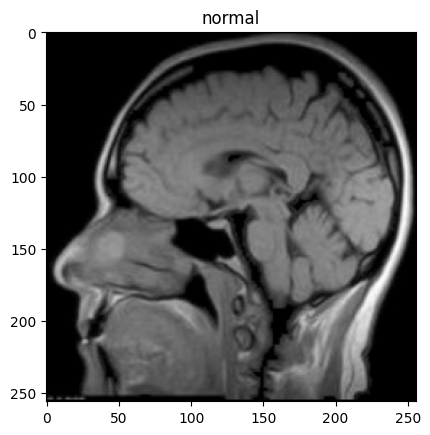

In [23]:
img = plt.imread((root + out_classes[0] + '/' + (os.listdir(root + out_classes[0])[1])))
plt.imshow(img)
plt.title(out_classes[0])

In [24]:
img_size = [224, 224, 3]

In [25]:
model = MobileNetV3Small(input_shape= img_size, weights='imagenet', include_top=False)

4334752/4334752 [==============================] - 0s 0us/step


In [26]:
 for layer in model.layers:
        layer.trainable = False

In [27]:
x = Flatten()(model.output)
pred = Dense(units= out_size, activation= 'softmax')(x)

model = Model(inputs = model.input, outputs  = pred)

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                                    

In [29]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [30]:
data_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.3,
                               zoom_range = 0.4,
                               horizontal_flip = True)

In [31]:
df = data_gen.flow_from_directory(root,
                                  target_size = (224, 224),
                                  batch_size = 50,
                                  class_mode= 'categorical')

Found 3096 images belonging to 4 classes.


In [ ]:
model_hist = model.fit_generator(
    df,
    epochs = 20,
    steps_per_epoch = len(df)
)

Epoch 1/20
62/62 [==============================] - 48s 586ms/step - loss: 1.6306 - accuracy: 0.3240
Epoch 2/20
62/62 [==============================] - 39s 630ms/step - loss: 1.4191 - accuracy: 0.3511
Epoch 3/20
62/62 [==============================] - 38s 609ms/step - loss: 1.3455 - accuracy: 0.3995
Epoch 4/20
19/62 [========>.....................] - ETA: 25s - loss: 1.2337 - accuracy: 0.4218